In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("./pokemon0820.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


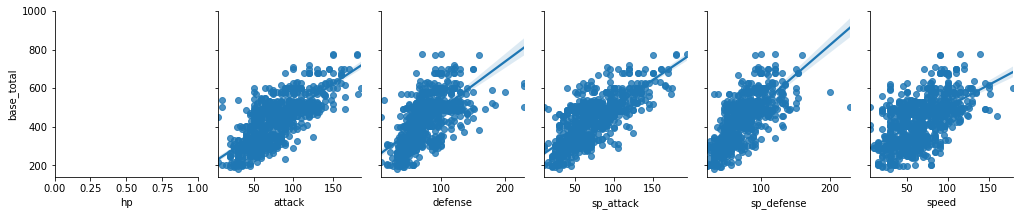

In [6]:
sns.pairplot(df, x_vars=['hp','attack','defense','sp_attack','sp_defense','speed'], y_vars='base_total', size=3,aspect=0.8,kind = 'reg')
#plt.savefig("pairplot.jpg")
plt.show()

In [8]:
X=df[['hp','attack','defense','sp_attack','sp_defense','speed']]

In [9]:
X=df[['hp','attack','defense','sp_attack','sp_defense','speed']]

In [10]:
X.head()

,hp,attack,defense,sp_attack,sp_defense,speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,100,123,122,120,80
3,39,52,43,60,50,65
4,58,64,58,80,65,80


In [11]:
Y=df[['base_total']]
Y.head()

,base_total
0,318
1,405
2,625
3,309
4,405


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(600, 6)
(600, 1)
(201, 6)
(201, 1)


In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
print(linreg.intercept_)
print(linreg.coef_)

[0.]
[[1. 1. 1. 1. 1. 1.]]


In [15]:
#模型评价

#模型拟合测试集
Y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(Y_test, Y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MSE: 4.537308144688512e-27
RMSE: 6.735954382779408e-14


In [16]:
#交叉验证

#计算MSE和RMSE
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, Y, cv=10)
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(Y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y, predicted)))

MSE: 1.4154035845307798e-26
RMSE: 1.189707352474036e-13


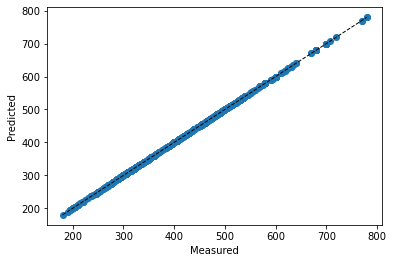

In [17]:
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [18]:
X = df[['hp','attack','defense','sp_attack','sp_defense','speed']]   
X.head()  

,hp,attack,defense,sp_attack,sp_defense,speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,100,123,122,120,80
3,39,52,43,60,50,65
4,58,64,58,80,65,80


In [19]:
y = df[['base_total']]
#y = df.base_total
y.head()

,base_total
0,318
1,405
2,625
3,309
4,405


In [20]:
#构造训练集和测试集  
from sklearn.model_selection import train_test_split  #交叉验证  
X_train,X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
print(X_train.shape)
print(Y_train.shape) 
print(X_test.shape)
print(Y_test.shape)

(600, 6)
(600, 1)
(201, 6)
(201, 1)


In [21]:
Y_pred = linreg.predict(X_test)  
print(Y_pred)

[[630.]
 [200.]
 [510.]
 [330.]
 [528.]
 [240.]
 [300.]
 [300.]
 [600.]
 [530.]
 [479.]
 [320.]
 [300.]
 [401.]
 [600.]
 [600.]
 [530.]
 [521.]
 [464.]
 [580.]
 [413.]
 [405.]
 [530.]
 [465.]
 [300.]
 [318.]
 [521.]
 [405.]
 [580.]
 [600.]
 [510.]
 [305.]
 [430.]
 [413.]
 [275.]
 [325.]
 [488.]
 [340.]
 [610.]
 [325.]
 [708.]
 [525.]
 [300.]
 [499.]
 [500.]
 [305.]
 [480.]
 [300.]
 [490.]
 [370.]
 [600.]
 [385.]
 [618.]
 [431.]
 [309.]
 [330.]
 [485.]
 [495.]
 [470.]
 [440.]
 [565.]
 [260.]
 [471.]
 [485.]
 [289.]
 [680.]
 [500.]
 [494.]
 [328.]
 [500.]
 [465.]
 [680.]
 [455.]
 [200.]
 [580.]
 [295.]
 [325.]
 [410.]
 [335.]
 [325.]
 [600.]
 [300.]
 [300.]
 [309.]
 [385.]
 [349.]
 [625.]
 [470.]
 [770.]
 [415.]
 [580.]
 [405.]
 [290.]
 [455.]
 [405.]
 [360.]
 [351.]
 [375.]
 [508.]
 [448.]
 [316.]
 [390.]
 [325.]
 [510.]
 [700.]
 [540.]
 [455.]
 [358.]
 [505.]
 [305.]
 [680.]
 [490.]
 [497.]
 [260.]
 [525.]
 [420.]
 [420.]
 [680.]
 [425.]
 [500.]
 [545.]
 [520.]
 [423.]
 [483.]
 [380.]


In [22]:
print(type(Y_pred))

<class 'numpy.ndarray'>


In [23]:
y_pred=linreg.predict(X_test)
#print(Y_pred)
#print(type(Y_pred))
#性能评估
print(type(Y_pred),type(Y_test))
print(len(Y_pred),len(Y_test))
print(Y_pred.shape,Y_test.shape)
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
print("RMSE by hand：",np.sqrt(sum_mean/len(Y_pred)))

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>
201 201
(201, 1) (201, 1)
RMSE by hand： [6.73595438e-14]


In [24]:
#计算预测的RMSE  
print(type(Y_pred),type(Y_test))
print(len(Y_pred),len(Y_test))
print(Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/len(Y_pred))  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>
201 201
(201, 1) (201, 1)
RMSE by hand: [6.73595438e-14]


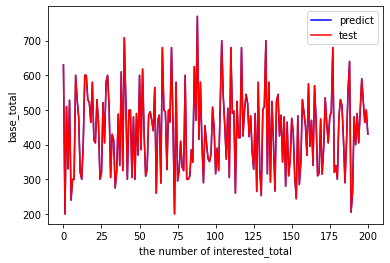

In [25]:
#测试
import matplotlib.pyplot as plt  
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签位置  
plt.xlabel("the number of interested_total")  
plt.ylabel('base_total')
plt.show()

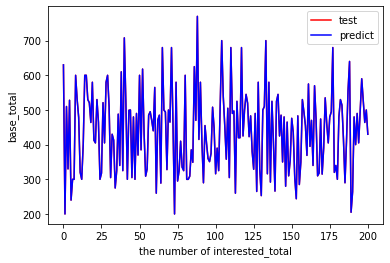

In [26]:
import matplotlib.pyplot as plt  
plt.figure()
plt.plot(range(len(Y_pred)),Y_test,'r',label="test") 
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.legend(loc="upper right") #显示图中的标签位置  
plt.xlabel("the number of interested_total")  
plt.ylabel('base_total')
plt.show()